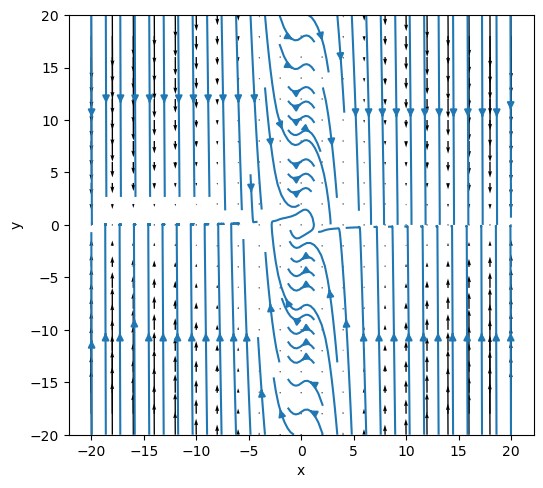

In [2]:
# code courtesy of Adam Dempsey
# modified for PHY1055 by Oisín Creaner
import matplotlib.pyplot as plt
import numpy as np

def main():
    plt.close('all')
    coords = np.linspace(-20, 20, 21)
    x, y = np.meshgrid(coords, coords)
    dx = y
    dy = -x + (1 - x**2) * y
    plt.figure(figsize=(6,6))
    plt.gca().set_aspect('equal', adjustable='box')  # Make plot box square
    plt.xlabel('x')
    plt.ylabel('y')
    plt.quiver(x, y, dx, dy)  # plot field as quiver
    plt.streamplot(x, y, dx, dy)  # plot streamlines of field.
    plt.show()


# if this is the module called directly, then execute the main function, otherwise only define it
if __name__ == '__main__':
    main()

In [3]:
# code courtesy of Adam Dempsey
# modified for PHY1055 by Oisín Creaner

import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate


def g6(t, y):
    x, v = y  # x is prey, v is predator
    dxdt = v
    dvdt = -x + (1 - x**2) * v
    dydt = np.array([dxdt, dvdt])
    return dydt

# define a lambda function in a proper program that takes these arguments
lfun = lambda t, y, : g6(t, y)

# Define the initial parameters
x0 = [3, -2, 0.1, 0.5]  # initial position
v0 = [3, 2, 0.1, 1]  # initial velocity
y0 = (x0, v0)  # initial state
t0 = 0  # initial time

a = 4
b = 2
c = 1/3
d = 1

# Define the final time and the number of time steps
tf = 10  # final time
n = 1001  # Number of points at which output will be evaluated
# Note: this does not mean the integrator will take only n steps
# Scipy will take more steps if required to control the error in the solution

# Create an array of the time steps
t = np.linspace(t0, tf, n)  # Points at which output will be evaluated

for i in y0:

# Calls the method integrate.solve_ivp()
    result = integrate.solve_ivp(fun=lfun,  # The function defining the derivative
                             t_span=(t0, tf),  # Initial and final times
                             y0=[i],  # Initial state
                             method="RK45",  # Integration method
                             t_eval=t)  # Time points for result to be defined at

# Read the solution and time from the result array returned by Scipy
    x, v = result.y
    t = result.t



    # Plotting the results
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

    # Plot prey and predator populations as a function of time
    ax[0].plot(t, x, label=r"Prey")
    ax[0].plot(t, v, label=r"Predator")
    ax[0].set_xlabel(r"Time")
    ax[0].legend(loc='upper right')

    # Create a phase space plot (Predator vs Prey)
    ax[1].plot(x, v, 'k')
    #ax[1].axis('equal')
    ax[1].set_xlabel(r"Prey population")
    ax[1].set_ylabel(r"Predator population")

    # Show the plot
    plt.tight_layout()
    plt.show()

ValueError: `y0` must be 1-dimensional.

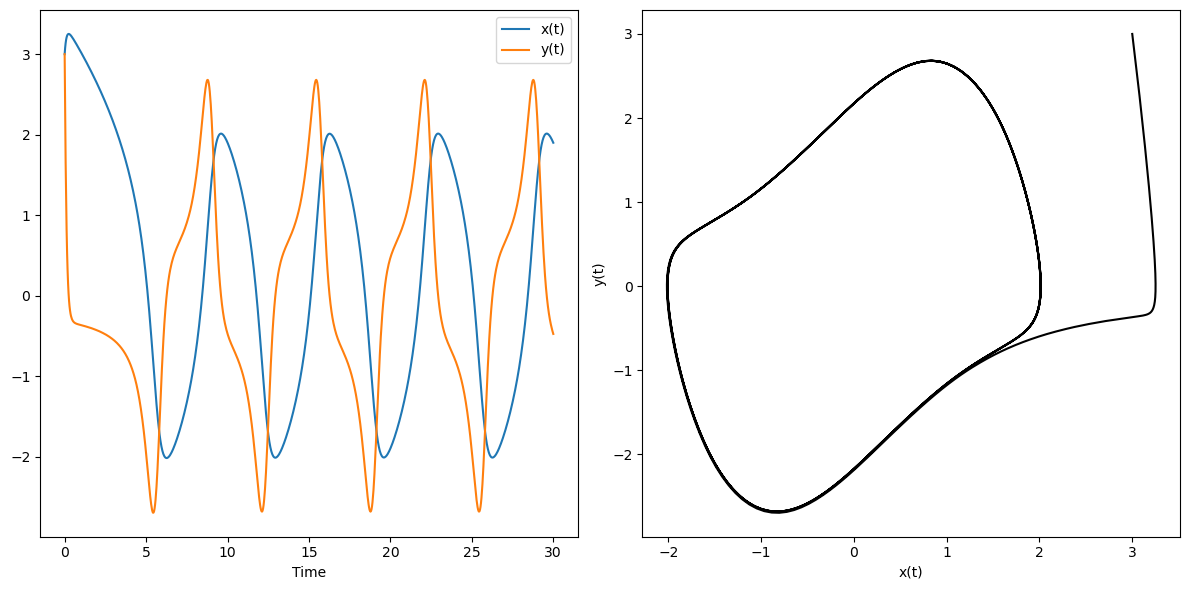

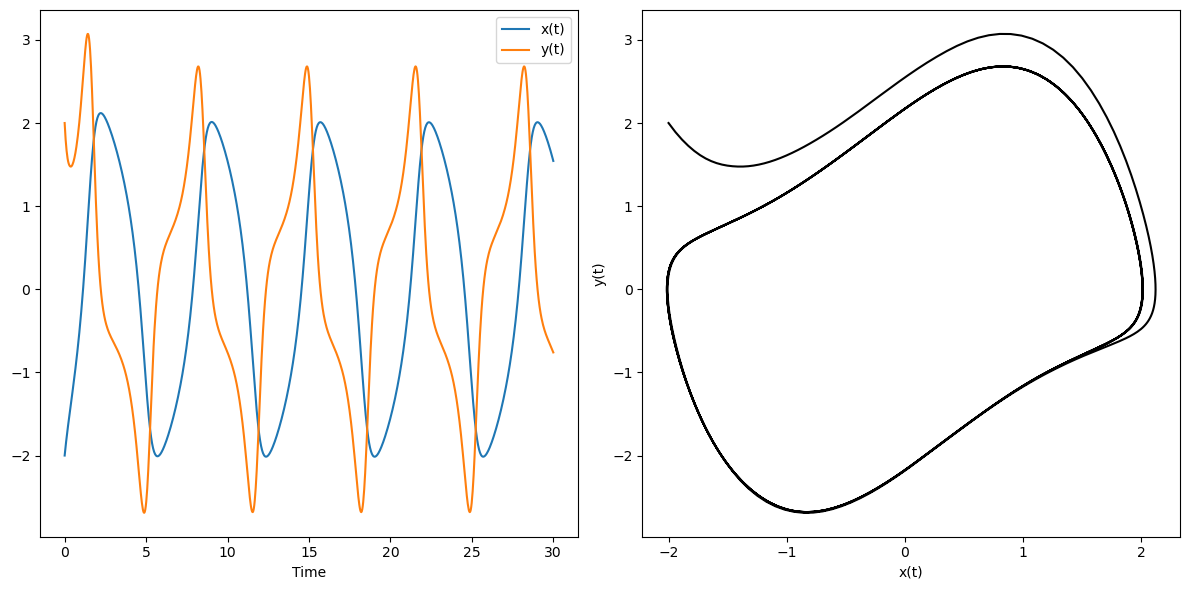

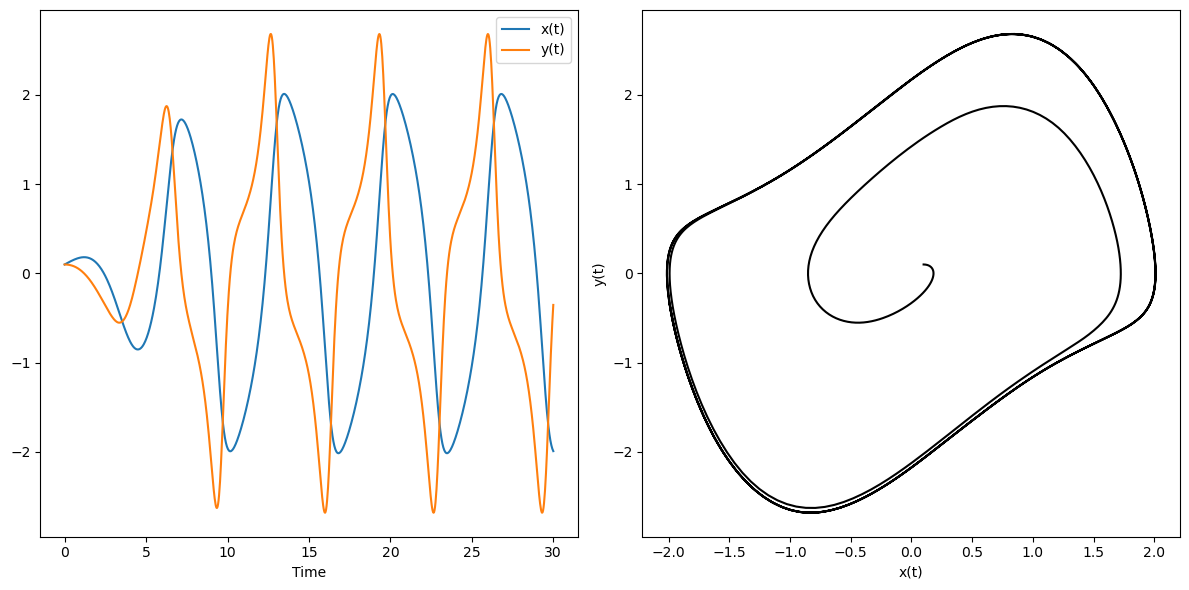

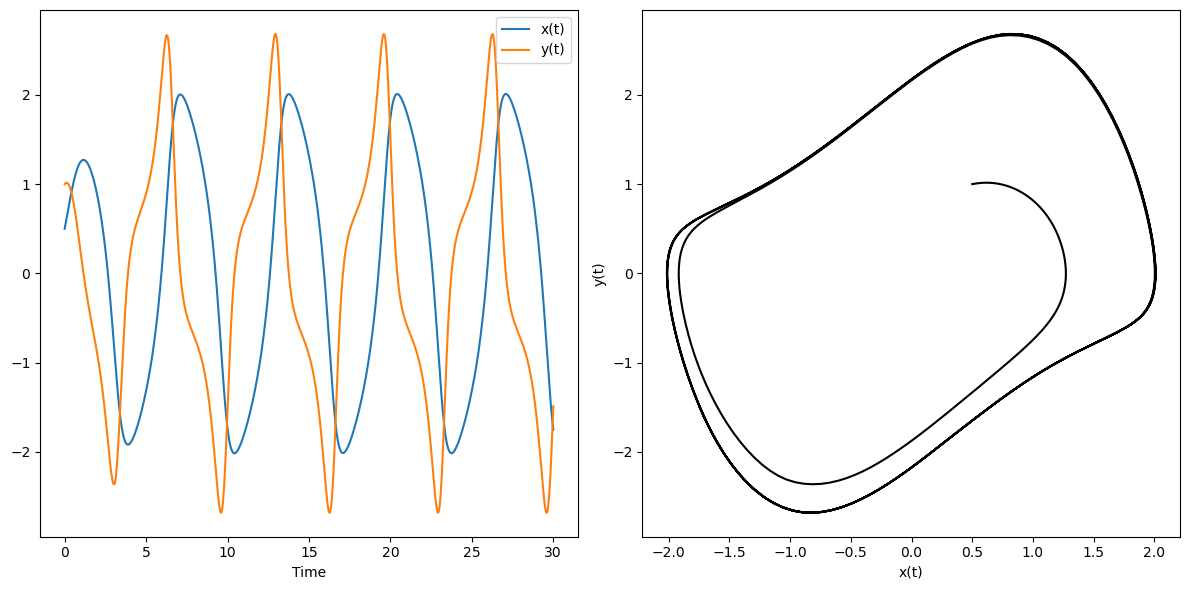

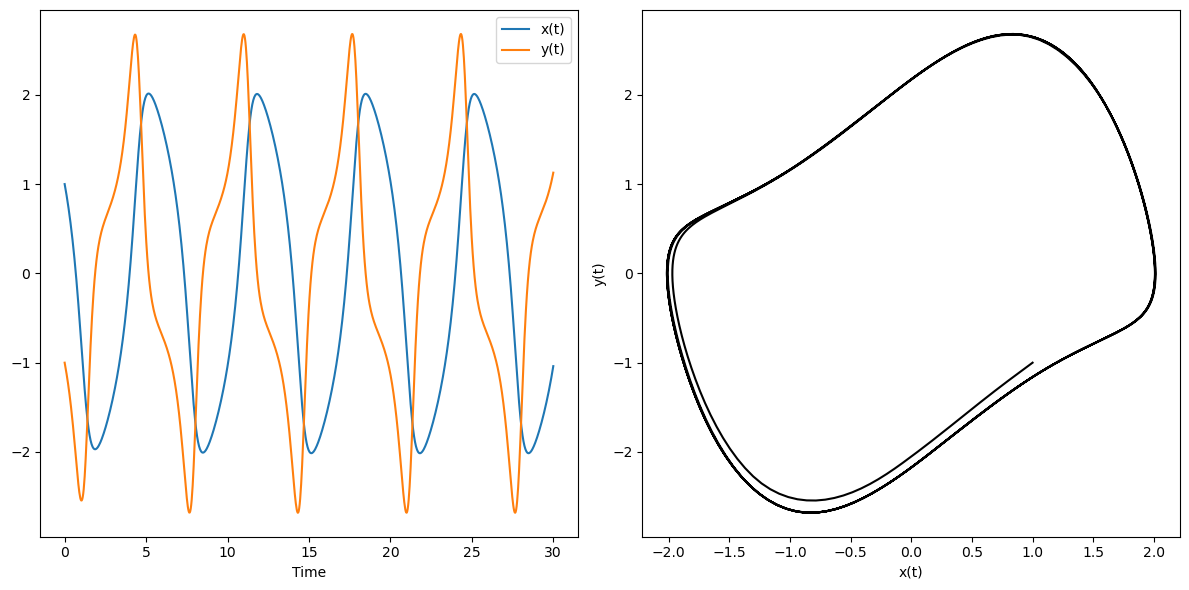

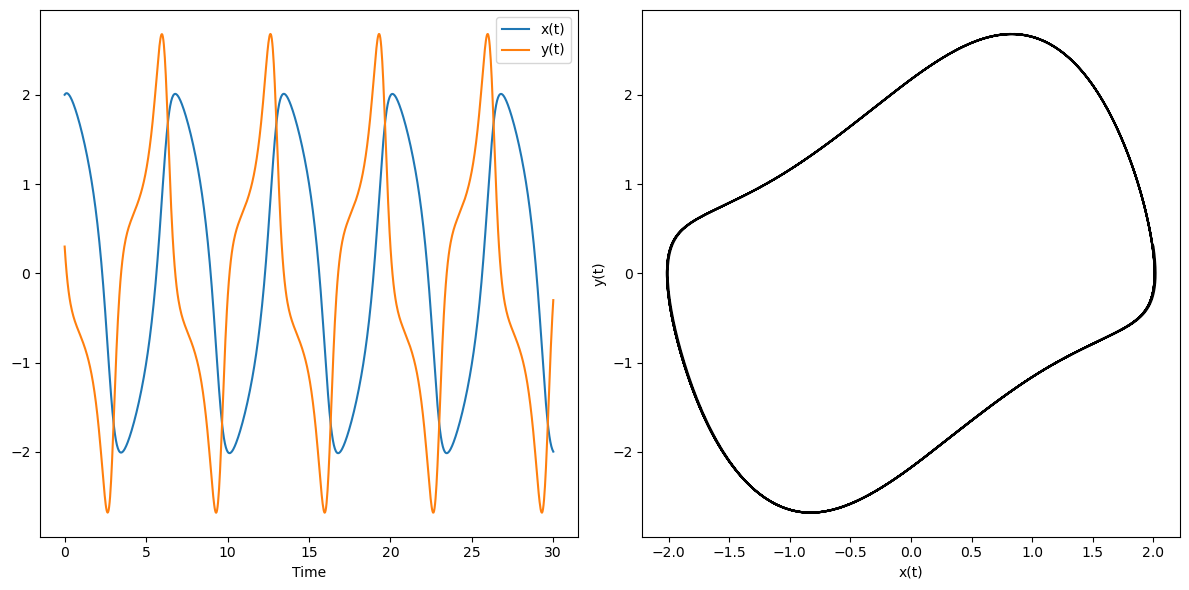

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# Define the system of ODEs
def g6(t, y):
    x, v = y  # x is the first variable, v is the second variable
    dxdt = v
    dvdt = -x + (1 - x**2) * v
    dydt = np.array([dxdt, dvdt])
    return dydt

# Define the initial parameters
x0_list = [3, -2, 0.1, 0.5, 1, 2]  # initial values for x
v0_list = [3, 2, 0.1, 1, -1, 0.3]     # initial values for v

t0 = 0   # initial time
tf = 30  # final time
n = 1001  # Number of time points

# Create an array of time steps
t = np.linspace(t0, tf, n)

# Loop over each pair of initial conditions
for x0, v0 in zip(x0_list, v0_list):
    y0 = [x0, v0]  # Initial state

    # Solve the system using solve_ivp
    result = integrate.solve_ivp(
        fun=g6,               # The function defining the system
        t_span=(t0, tf),      # The time span for the solution
        y0=y0,                # Initial conditions
        method="RK45",        # Integration method
        t_eval=t              # Time points at which to store the solution
    )

    # Extract the solution
    x, v = result.y
    t = result.t

    # Plotting the results
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

    # Plot x and v as a function of time
    ax[0].plot(t, x, label=r"x(t)")
    ax[0].plot(t, v, label=r"y(t)")
    ax[0].set_xlabel(r"Time")
    ax[0].legend(loc='upper right')

    # Create a phase space plot (v vs x)
    ax[1].plot(x, v, 'k')
    ax[1].set_xlabel(r"x(t)")
    ax[1].set_ylabel(r"y(t)")

    # Show the plot
    plt.tight_layout()
    plt.show()


C:\Users\niele\AppData\Local\Temp\ipykernel_22756\3291438250.py:59: RuntimeWarning: divide by zero encountered in divide
  v_y_isocline = x_vals / (1 - x_vals**2)


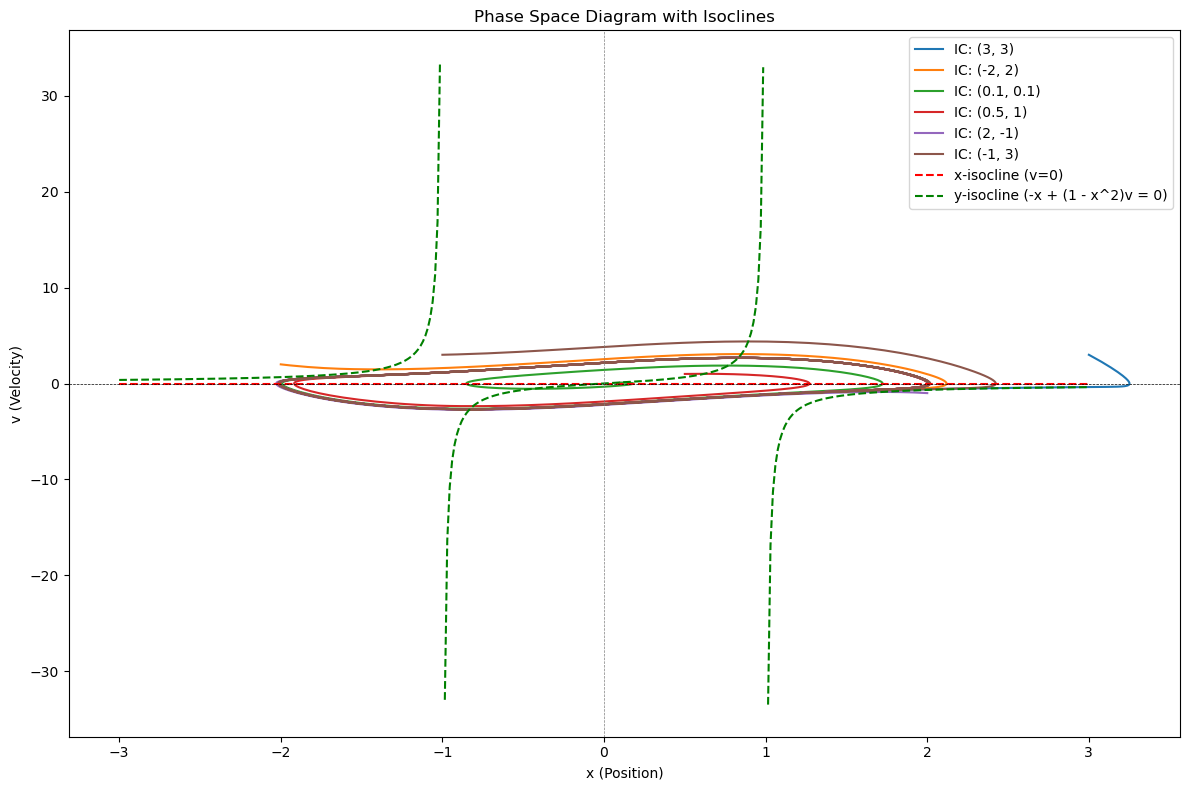

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# Define the system of ODEs
def g6(t, y):
    x, v = y  # x is the first variable, v is the second variable
    dxdt = v
    dvdt = -x + (1 - x**2) * v
    dydt = np.array([dxdt, dvdt])
    return dydt

# Define the initial parameters
initial_conditions = [
    (3, 3),
    (-2, 2),
    (0.1, 0.1),
    (0.5, 1),
    (2, -1),  # Additional initial condition
    (-1, 3)   # Additional initial condition
]

t0 = 0   # initial time
tf = 30  # final time
n = 1001  # Number of time points

# Create an array of time steps
t = np.linspace(t0, tf, n)

# Prepare the figure
plt.figure(figsize=(12, 8))

# Loop over each pair of initial conditions
for x0, v0 in initial_conditions:
    y0 = [x0, v0]  # Initial state

    # Solve the system using solve_ivp
    result = integrate.solve_ivp(
        fun=g6,               # The function defining the system
        t_span=(t0, tf),      # The time span for the solution
        y0=y0,                # Initial conditions
        method="RK45",        # Integration method
        t_eval=t              # Time points at which to store the solution
    )

    # Extract the solution
    x, v = result.y
    t = result.t

    # Plotting the results in phase space
    plt.plot(x, v, label=f"IC: ({x0}, {v0})")

# Calculate and plot the isoclines
x_vals = np.linspace(-3, 3, 400)
v_isocline = np.zeros_like(x_vals)  # x-isocline (v = 0)
plt.plot(x_vals, v_isocline, 'r--', label='x-isocline (v=0)') 

# y-isocline: solving -x + (1 - x^2)v = 0 for v
v_y_isocline = x_vals / (1 - x_vals**2)
plt.plot(x_vals, v_y_isocline, 'g--', label='y-isocline (-x + (1 - x^2)v = 0)')

# Setting up the plot
plt.title('Phase Space Diagram with Isoclines')
plt.xlabel('x (Position)')
plt.ylabel('v (Velocity)')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  # v = 0 line
plt.axvline(0, color='gray', linewidth=0.5, linestyle='--')   # x = 0 line
plt.legend()
plt.tight_layout()
plt.show()


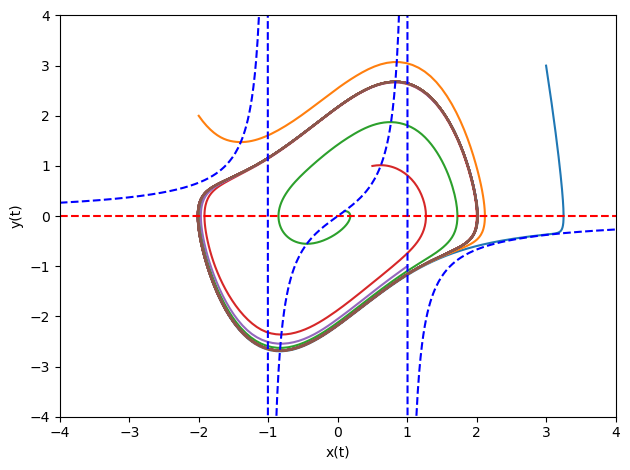

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# Define the system of ODEs
def g6(t, y):
    x, v = y  # x is the first variable, v is the second variable
    dxdt = v
    dvdt = -x + (1 - x**2) * v
    dydt = np.array([dxdt, dvdt])
    return dydt

# Define the initial parameters
x0_list = [3, -2, 0.1, 0.5, 1, 2]  # initial values for x
v0_list = [3, 2, 0.1, 1, -1, 0.3]     # initial values for v

t0 = 0   # initial time
tf = 30  # final time
n = 1001  # Number of time points

# Create an array of time steps
t = np.linspace(t0, tf, n)

# Plotting the results
plt.figure()

# Loop over each pair of initial conditions
for x0, v0 in zip(x0_list, v0_list):
    y0 = [x0, v0]  # Initial state

    # Solve the system using solve_ivp
    result = integrate.solve_ivp(
        fun=g6,               # The function defining the system
        t_span=(t0, tf),      # The time span for the solution
        y0=y0,                # Initial conditions
        method="RK45",        # Integration method
        t_eval=t              # Time points at which to store the solution
    )

    # Extract the solution
    x, v = result.y
    t = result.t

    # Create a phase space plot (v vs x)
    plt.plot(x, v, label=f'x_0={x0}, y_0={v0}')

plt.xlabel(r"x(t)")
plt.ylabel(r"y(t)")

# Calculate and plot the isoclines
x_vals = np.linspace(-4, 4, 400)
v_isocline = np.zeros_like(x_vals)  # x-isocline (v = 0)
plt.plot(x_vals, v_isocline, 'r--', label='x-isocline (v=0)') 

# y-isocline: solving -x + (1 - x^2)v = 0 for v
v_y_isocline = x_vals / (1 - x_vals**2)
plt.plot(x_vals, v_y_isocline, 'b--', label='y-isocline (-x + (1 - x^2)v = 0)')


# set axis limits
plt.xlim(-4, 4)
plt.ylim(-4, 4)

# Show the plot
plt.tight_layout()
#plt.legend(loc='best')
plt.show()
